# Tasks

#### 2:Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

- For instance, discard “ID,” “date,” and “index” variables.
    
#### 3:Create a correlation matrix heatmap (colored).

- Discuss what the coefficients in the plot mean in terms of the relationships between the variables.
    
#### 4: Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

- Discuss the output in a markdown cell.
    
#### 5: Create a pair plot of the entire data set.

- Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.
    
#### 6: Create a categorical plot and interpret the results.

#### 7: Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

#### 8: Define any hypotheses that you can at this point. You’ll be testing these later on.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Importing Data

In [2]:
path = r'C:\Users\maxca\Part 6 Gun Violence'

In [3]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_gun_law_pop_cleaned.csv'))

# Checking data

In [4]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,year,state_year,lawtotal,Total population
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,1.372442,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,2013,Pennsylvania2013,37,12581967
1,1,484268,2013-04-09,Pennsylvania,Philadelphia,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",39.9924,NaN,-75.1300,1.372442,0::21||1::18||2::22||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male||4::Male,2013,Pennsylvania2013,37,12581967
2,2,485885,2013-04-28,Pennsylvania,Chester,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",39.8564,NaN,-75.3587,2.000000,0::17||1::16||2::18||3::40,0::Teen 12-17||1::Teen 12-17||2::Adult 18+||3:...,0::Male||1::Male||3::Male||4::Male||5::Male||6...,2013,Pennsylvania2013,37,12581967
3,3,486068,2013-05-06,Pennsylvania,Johnstown,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3091,NaN,-78.9124,1.372442,0::24,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,2013,Pennsylvania2013,37,12581967
4,4,486121,2013-05-11,Pennsylvania,Philadelphia,0,4,Shot - Wounded/Injured||Drive-by (car to stree...,40.0505,NaN,-75.1554,1.372442,0::15||1::16||2::17||3::20,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Male||2::Male||3::Male||4::Male,2013,Pennsylvania2013,37,12581967


In [5]:
df.shape

(236482, 19)

# Dropping every column we don't need for our questions - refere to Project Excel 

In [6]:
df = df.drop(columns =['participant_gender', 'participant_age_group', 'participant_age' ])

In [7]:
df = df.drop(columns =['Unnamed: 0'])

In [8]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,year,state_year,lawtotal,Total population
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,1.372442,2013,Pennsylvania2013,37,12581967
1,484268,2013-04-09,Pennsylvania,Philadelphia,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",39.9924,NaN,-75.1300,1.372442,2013,Pennsylvania2013,37,12581967
2,485885,2013-04-28,Pennsylvania,Chester,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",39.8564,NaN,-75.3587,2.000000,2013,Pennsylvania2013,37,12581967
3,486068,2013-05-06,Pennsylvania,Johnstown,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3091,NaN,-78.9124,1.372442,2013,Pennsylvania2013,37,12581967
4,486121,2013-05-11,Pennsylvania,Philadelphia,0,4,Shot - Wounded/Injured||Drive-by (car to stree...,40.0505,NaN,-75.1554,1.372442,2013,Pennsylvania2013,37,12581967


# Dropping the year 2013 overall since the numbers are not accurate

In [9]:

# Assuming your data is stored in a DataFrame called df
# Convert the 'year' column to datetime type
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Filter out the rows with year 2013
df = df[df['year'].dt.year != 2013]

# Reset index
df.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(df)

        incident_id        date     state          city_or_county  n_killed  \
0             95289  2014-01-01  Michigan                Muskegon         0   
1             92607  2014-01-01  Michigan                 Detroit         0   
2             92602  2014-01-01  Michigan                 Detroit         2   
3             92620  2014-01-01  Michigan                 Detroit         0   
4             92612  2014-01-01  Michigan                 Detroit         0   
...             ...         ...       ...                     ...       ...   
236205      1073419  2018-03-18   Wyoming                  Casper         1   
236206      1076613  2018-03-19   Wyoming                Cheyenne         1   
236207      1074675  2018-03-21   Wyoming                  Casper         0   
236208      1076607  2018-03-22   Wyoming                Glenrock         1   
236209      1079998  2018-03-28   Wyoming  Jackson (Jackson Hole)         0   

        n_injured                           inciden

# Correlation

#### 2:Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

In [10]:
df.dtypes

incident_id                          int64
date                                object
state                               object
city_or_county                      object
n_killed                             int64
n_injured                            int64
incident_characteristics            object
latitude                           float64
location_description                object
longitude                          float64
n_guns_involved                    float64
year                        datetime64[ns]
state_year                          object
lawtotal                             int64
Total population                     int64
dtype: object

In [11]:
df_numbers = df.groupby('state_year').aggregate({'incident_id' : 'count', 'n_killed': 'sum',
                             'n_injured': 'sum', 'n_guns_involved' : 'sum', 'lawtotal': 'first', 'Total population' : 'first'})

In [12]:
df_numbers.head(15)

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population
state_year,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293
Alabama2015,1034,385,562,1484.432117,10,4387292
Alabama2016,1309,488,761,1839.658694,10,4540957
Alabama2017,1461,544,856,1882.117325,10,4592069
Alabama2018,347,135,219,393.000000,10,4533634
Alaska2014,146,29,49,192.458346,3,627018
Alaska2015,380,70,84,508.253676,3,679049
Alaska2016,445,88,103,611.769387,3,699828
Alaska2017,317,69,70,425.000000,3,696103


In [13]:
df_numbers.describe()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population
count,250.000000,250.000000,250.00000,250.000000,250.000000,2.500000e+02
mean,944.840000,238.816000,464.16000,1296.683471,27.012000,6.133613e+06
std,988.674285,278.745062,580.64406,1376.179589,26.500963,6.980713e+06
min,14.000000,1.000000,0.00000,16.000000,1.000000,4.900890e+05
25%,224.000000,42.250000,73.75000,306.435501,9.000000,1.630500e+06
50%,562.500000,126.000000,232.50000,751.089941,16.000000,4.232314e+06
75%,1355.500000,351.000000,690.75000,1869.858247,37.000000,6.884491e+06
max,5089.000000,1423.000000,4137.00000,6952.944661,109.000000,3.855325e+07


In [14]:
# Calculate incidents per 100000 population
df_numbers['incidents_per_100000'] = (df_numbers['incident_id'] / df_numbers['Total population']) * 100000

In [15]:
# Calculate n_killed per 100000 population
df_numbers['n_killed_per_100000'] = (df_numbers['n_killed'] / df_numbers['Total population']) * 100000

In [16]:
# Calculate injured per 100000 population
df_numbers['n_injured_per_100000'] = (df_numbers['n_injured'] / df_numbers['Total population']) * 100000

In [17]:
# Calculate n_guns_involved per 100000 population
df_numbers['n_guns_involved_per_100000'] = (df_numbers['n_guns_involved'] / df_numbers['Total population']) * 100000

In [18]:
df_numbers.head() #(incident_id is the count of incidents)

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000
state_year,,,,,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293,29.254479,7.213737,13.117904,39.777063
Alabama2015,1034,385,562,1484.432117,10,4387292,23.568069,8.775345,12.809724,33.834815
Alabama2016,1309,488,761,1839.658694,10,4540957,28.826523,10.746633,16.758582,40.512577
Alabama2017,1461,544,856,1882.117325,10,4592069,31.815724,11.846512,18.640835,40.986260
Alabama2018,347,135,219,393.000000,10,4533634,7.653904,2.977744,4.830562,8.668543


In [19]:
df_numbers.corr()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000
incident_id,1.000000,0.938864,0.956366,0.980342,0.291116,0.736919,0.290746,0.397101,0.520703,0.271022
n_killed,0.938864,1.000000,0.873184,0.938740,0.194262,0.798319,0.199319,0.427028,0.428073,0.186122
n_injured,0.956366,0.873184,1.000000,0.928944,0.265465,0.642530,0.302459,0.407976,0.599804,0.275608
n_guns_involved,0.980342,0.938740,0.928944,1.000000,0.322974,0.772126,0.255627,0.366446,0.473777,0.260730
lawtotal,0.291116,0.194262,0.265465,0.322974,1.000000,0.451441,-0.182670,-0.305188,-0.050159,-0.169349
Total population,0.736919,0.798319,0.642530,0.772126,0.451441,1.000000,-0.183937,-0.020708,0.014180,-0.179015
incidents_per_100000,0.290746,0.199319,0.302459,0.255627,-0.182670,-0.183937,1.000000,0.802966,0.825741,0.977765
n_killed_per_100000,0.397101,0.427028,0.407976,0.366446,-0.305188,-0.020708,0.802966,1.000000,0.825098,0.779714
n_injured_per_100000,0.520703,0.428073,0.599804,0.473777,-0.050159,0.014180,0.825741,0.825098,1.000000,0.786714
n_guns_involved_per_100000,0.271022,0.186122,0.275608,0.260730,-0.169349,-0.179015,0.977765,0.779714,0.786714,1.000000


# Correlation Heatmaps

#### 3:Create a correlation matrix heatmap (colored).

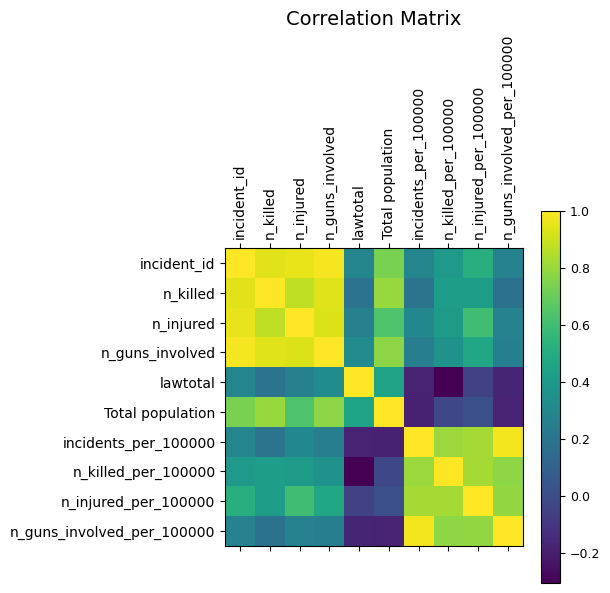

In [20]:
plt.matshow(df_numbers.corr())
plt.xticks(range(df_numbers.shape[1]), df_numbers.columns, fontsize=10, rotation=90) 
plt.yticks(range(df_numbers.shape[1]), df_numbers.columns, fontsize=10) 
cb = plt.colorbar() 
cb.ax.tick_params(labelsize=9) 
plt.title('Correlation Matrix', fontsize=14) 
plt.show()

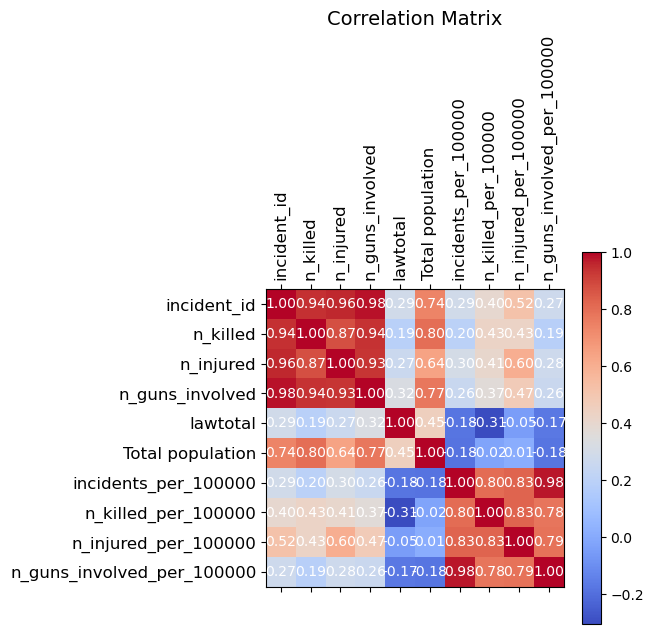

In [21]:
plt.matshow(df_numbers.corr(), cmap='coolwarm', fignum=1)
plt.xticks(range(df_numbers.shape[1]), df_numbers.columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(df_numbers.shape[1]), df_numbers.columns, fontsize=12) # y axis labels
plt.colorbar() # add a colour legend (called colorbar)
plt.title('Correlation Matrix', fontsize=14) # add title

# Add correlation values
for i in range(df_numbers.shape[1]):
    for j in range(df_numbers.shape[1]):
        plt.text(j, i, "{:.2f}".format(df_numbers.corr().iloc[i, j]), ha='center', va='center', color='white')

plt.show()

# Make the heatmap bigger

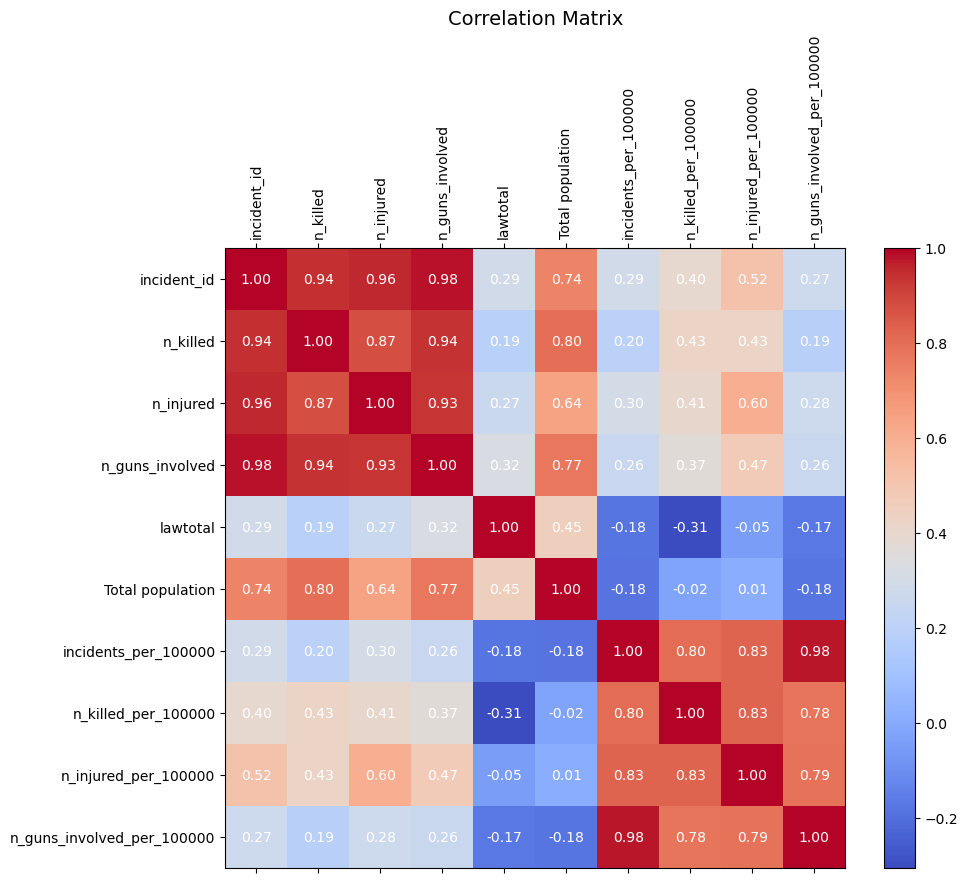

In [22]:
plt.figure(figsize=(10, 8))  


plt.matshow(df_numbers.corr(), cmap='coolwarm', fignum=1)
plt.xticks(range(df_numbers.shape[1]), df_numbers.columns, fontsize=10, rotation=90) 
plt.yticks(range(df_numbers.shape[1]), df_numbers.columns, fontsize=10) 
plt.colorbar() 
plt.title('Correlation Matrix', fontsize=14) 

# Add correlation values
for i in range(df_numbers.shape[1]):
    for j in range(df_numbers.shape[1]):
        plt.text(j, i, "{:.2f}".format(df_numbers.corr().iloc[i, j]), ha='center', va='center', color='white')

plt.show()

# Outcome:

#### As we can see we have a few strong positive correlations between:
- incident number and n_killed, n-injured and n_guns_involved - this is to be expected.
- the same goes for n_killed and n_injured aswell as n_guns_involved.
- more interesting is the correlation between the total population and n_killed, n_injured and n_guns_involved since this is to be expected we build the variables per 100000. 

- one of the main correlations for our project is the (weak) negtive correlations between the total number of gun laws (lawtotal) and the amount of injured and n_guns_involved per 100000.
- the correlation between lawtotal and n_killed_per_100000 is moderat negative

#### For further analysis we will look at the lawtotal and n_killed and n_injured aswell as n_guns_involved per 100000 variables.

# Scatter plot 

#### 4: Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


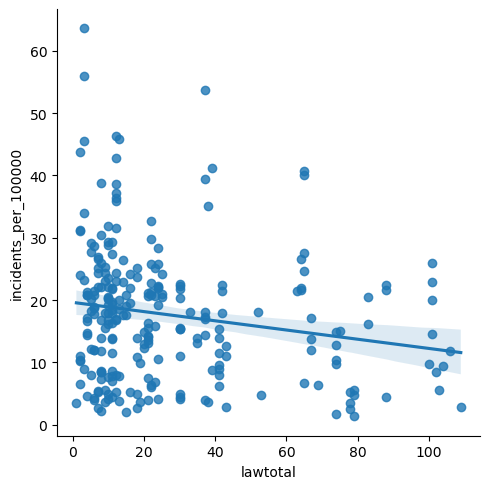

In [23]:
# Create a scatterplot for the "lawtotal" and "incidents_per_1000" columns in seaborn

sns.lmplot(x = 'lawtotal', y = 'incidents_per_100000', data = df_numbers)

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


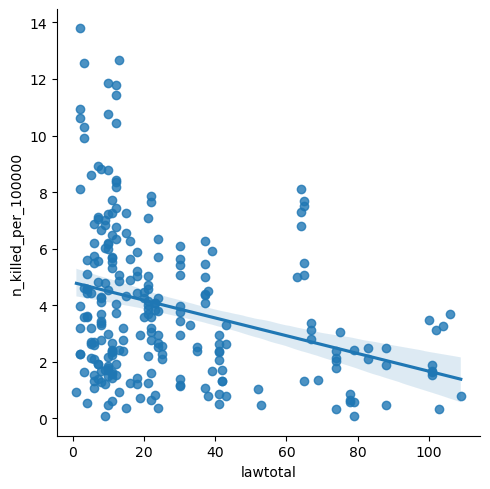

In [24]:
# Create a scatterplot for the "lawtotal" and "n_killed_per_1000" columns in seaborn

sns.lmplot(x = 'lawtotal', y = 'n_killed_per_100000', data = df_numbers)

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


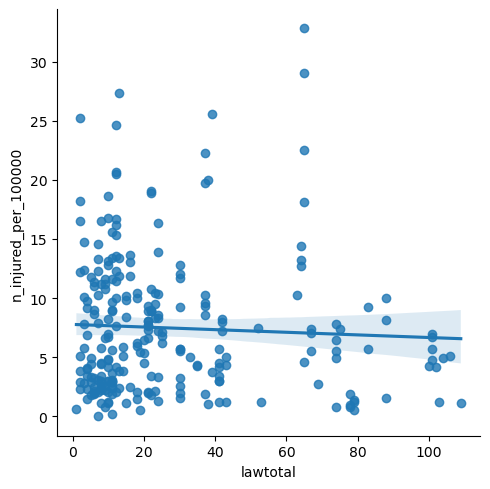

In [25]:
# Create a scatterplot for the "lawtotal" and "n_injured_per_1000" columns in seaborn

sns.lmplot(x = 'lawtotal', y = 'n_injured_per_100000', data = df_numbers)

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


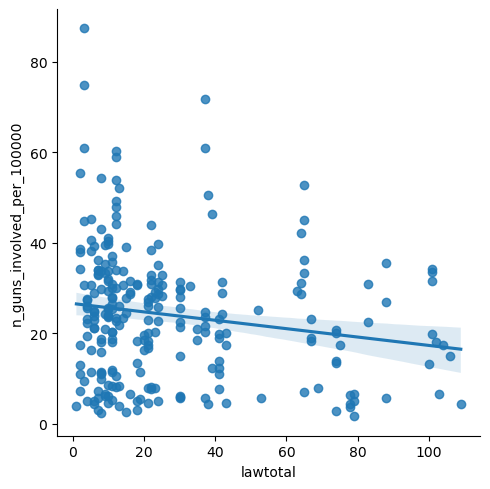

In [26]:
# Create a scatterplot for the "lawtotal" and "n_guns_involved_per_1000" columns in seaborn

sns.lmplot(x = 'lawtotal', y = 'n_guns_involved_per_100000', data = df_numbers)

# Pair Plot

#### 5: Create a pair plot of the entire data set.

In [27]:
# Keep only the variables you want to use in the pair plot

sub = df_numbers[['lawtotal', 'n_guns_involved_per_100000', 'n_injured_per_100000', 'incidents_per_100000', 'n_killed_per_100000']]

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

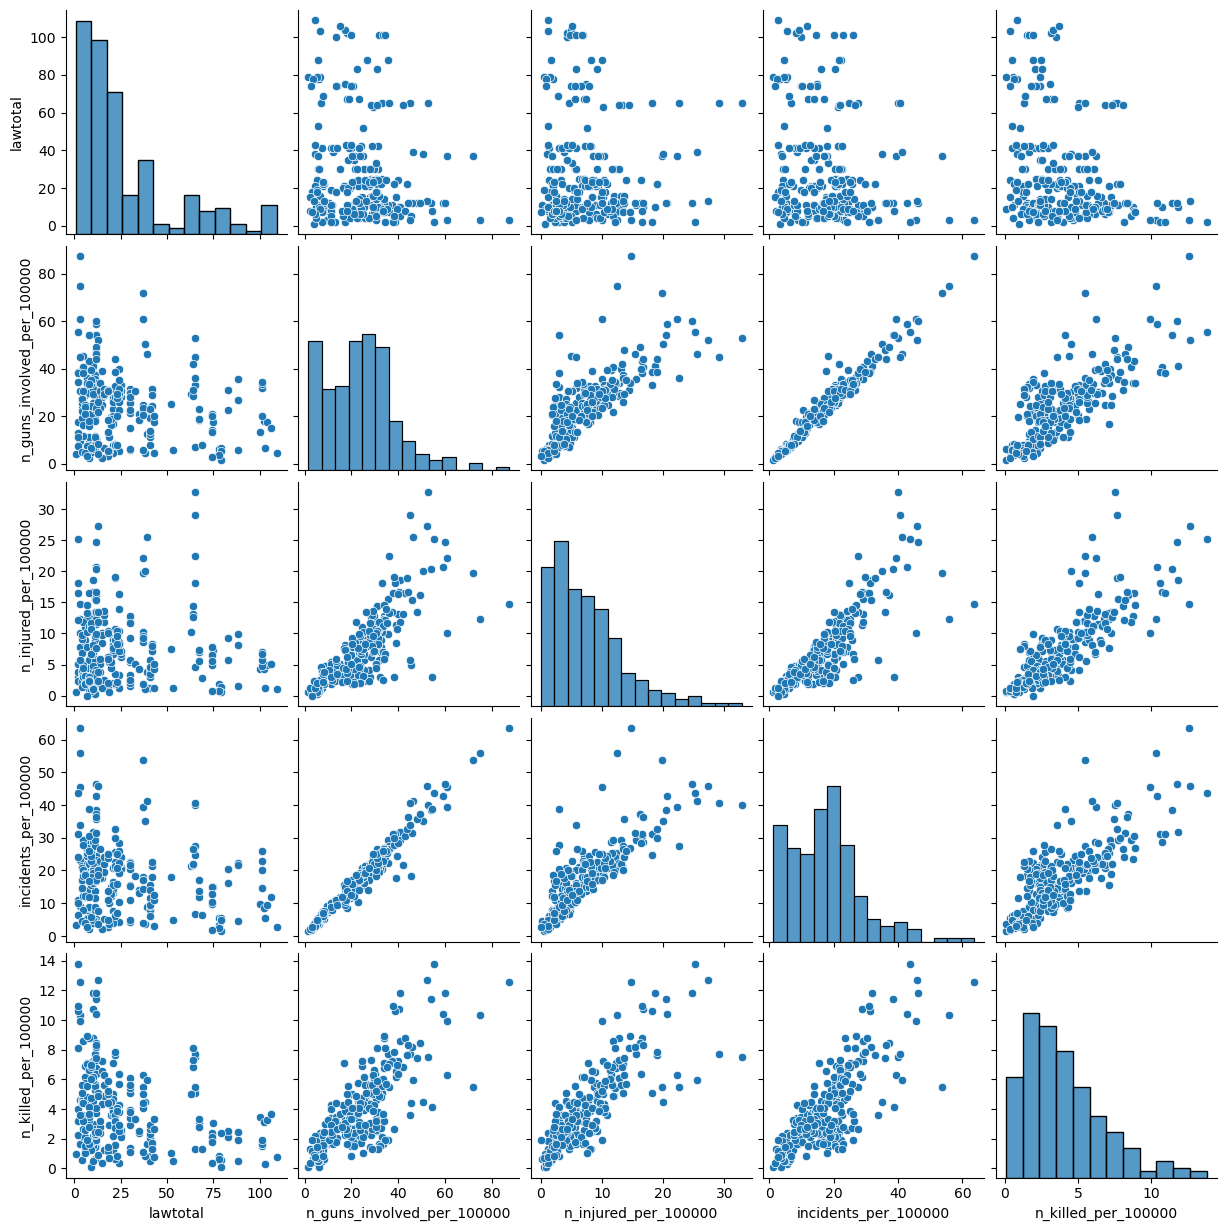

In [28]:
# Create a pair plot 

g = sns.pairplot(sub)

# Categorical Plot

#### 6:Create a categorical plot and interpret the results.

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lawtotal', ylabel='Count'>

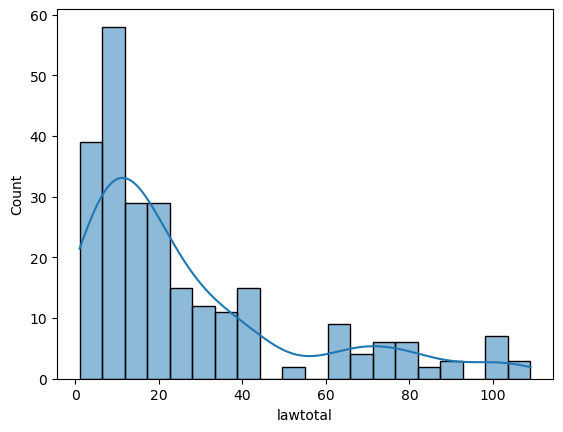

In [29]:
sns.histplot(df_numbers['lawtotal'], bins = 20, kde = True)

In [30]:
df_numbers.loc[df_numbers['lawtotal'] < 20, 'Amount of Gun Laws'] = 'Low amount'

In [31]:
df_numbers.loc[(df_numbers['lawtotal'] >= 20) & (df_numbers['lawtotal'] < 60), 'Amount of Gun Laws'] = 'Medium amount'

In [32]:
df_numbers.loc[df_numbers['lawtotal'] >= 60, 'Amount of Gun Laws'] = 'High amount'

In [33]:
df_numbers['Amount of Gun Laws'].value_counts(dropna = False)

Amount of Gun Laws
Low amount       134
Medium amount     76
High amount       40
Name: count, dtype: int64

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


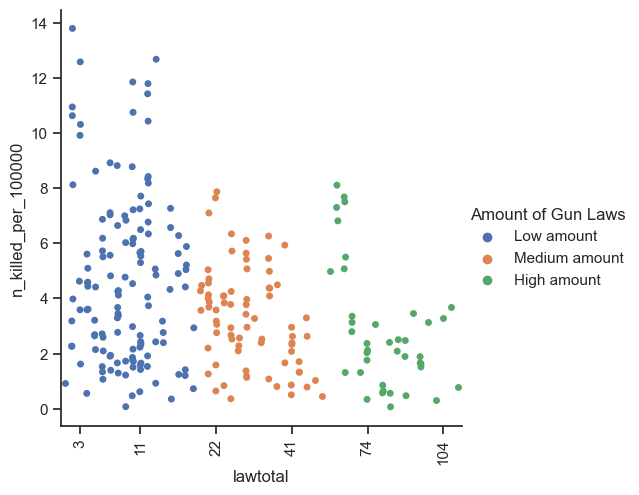

In [34]:
# Categorial Plot for n_killed_per_100000 and lawtotal
sns.set(style="ticks")
g = sns.catplot(x="lawtotal", y="n_killed_per_100000", hue="Amount of Gun Laws", data=df_numbers)
tick_positions = [2, 10, 20, 30, 40, 50]
plt.xticks(tick_positions, rotation=90)
plt.show()

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


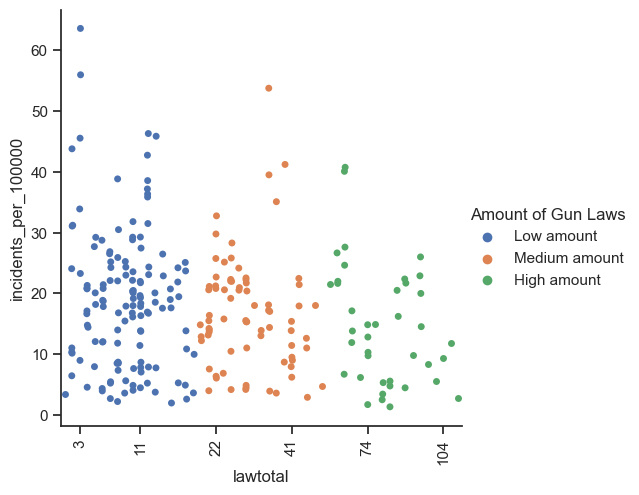

In [35]:
# Categorial Plot for Incidents_per_100000 and lawtotal
sns.set(style="ticks")
g = sns.catplot(x="lawtotal", y="incidents_per_100000", hue="Amount of Gun Laws", data=df_numbers)
tick_positions = [2, 10, 20, 30, 40, 50]
plt.xticks(tick_positions, rotation=90)
plt.show()

#### 8: Define any hypotheses that you can at this point. You’ll be testing these later on.

#### We will define our hypotheses with the variable lawtotal as an independent variable and the variables n_guns_involved_per_100000', 'n_injured_per_100000', 'incidents_per_100000', 'n_killed_per_100000' as the dependent:

1. The more gun laws exist in a state the less people will be injured trough gun related violence.
2. The more gun laws exist in a state the less people will be killend trough gun related violence.
3. The more gun laws exist in a state the less gun related incidents occure.
4. The more gun laws exist in a state the less guns are involved in gun related incidents.

# Exporting df without aggregation and with geographical data

In [36]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_gunviolence_cleand_2.csv'))

In [39]:
df.shape

(236210, 15)

# Exporting df_numbers with aggregation and variables per 100000

In [37]:
df_numbers.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_gunviolence_cleand_aggregated.csv'))

In [40]:
df_numbers.shape

(250, 11)